# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with the RDKit

## Calculate Descriptors

RDKit cntains a 'List of Available Descriptors' (https://www.rdkit.org/docs/GettingStartedInPython.html). To be able to use them we have to import the submodule into our notebook.

In [1]:
import math

from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
import pandas as pd
from scipy import stats

from hints import hint

First let's load the database using pandas which we will use for the next few exercises.

In [2]:
drugs = pd.read_csv('drugs.smi')
drugs['images'] = drugs['smiles'].apply(Chem.MolFromSmiles)
drugs

,Unnamed: 0,name,smiles,images
0,0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73080>
1,1,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73170>
2,2,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73120>
3,3,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa730d0>
4,4,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa731c0>
...,...,...,...,...
9075,9075,Magnesium acetate,[Mg++].CC([O-])=O.CC([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7f231fa28850>
9076,9076,Baloxavir marboxil,[H][C@@]12COCCN1C(=O)C1=C(OCOC(=O)OC)C(=O)C=CN...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa288a0>
9077,9077,Tetraglyme,COCCOCCOCCOCCOC,<rdkit.Chem.rdchem.Mol object at 0x7f231fa288f0>
9078,9078,alpha-Tocopherol succinate,[H][C@@](C)(CCCC(C)C)CCC[C@@]([H])(C)CCC[C@]1(...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa28940>


# Exercise 1: Linear Regression

1) calculate the descriptors for the exact molecular weight and the heavy atom molecular weight.

In [9]:
hint("comm_1.1")
hint("comm_1.2")

drugs['exactDesc'] = drugs['images'].apply(Descriptors.ExactMolWt)
drugs['heavyDesc'] = drugs['images'].apply(Descriptors.HeavyAtomMolWt)
drugs

You need to draw the molecules to be able to calculate the descriptors.
The commands you are looking for are 'Descriptors.ExactMolWt' and 'Descriptors.HeavyAtomMolWt'.


,Unnamed: 0,name,smiles,images,exactDesc,heavyDesc
0,0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73080>,2178.985813,2041.213
1,1,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73170>,1268.641439,1184.761
2,2,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa73120>,1810.033419,1675.173
3,3,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa730d0>,1068.426955,1004.726
4,4,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa731c0>,1429.669818,1338.328
...,...,...,...,...,...,...
9075,9075,Magnesium acetate,[Mg++].CC([O-])=O.CC([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7f231fa28850>,142.011650,136.345
9076,9076,Baloxavir marboxil,[H][C@@]12COCCN1C(=O)C1=C(OCOC(=O)OC)C(=O)C=CN...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa288a0>,571.122478,548.374
9077,9077,Tetraglyme,COCCOCCOCCOCCOC,<rdkit.Chem.rdchem.Mol object at 0x7f231fa288f0>,222.146724,200.105
9078,9078,alpha-Tocopherol succinate,[H][C@@](C)(CCCC(C)C)CCC[C@@]([H])(C)CCC[C@]1(...,<rdkit.Chem.rdchem.Mol object at 0x7f231fa28940>,530.397125,476.358


2) investigate the correlation between the two descriptors

Parameters of regression:
 Slope =1.062156188310818
 Intercept = 0.1389110750425857


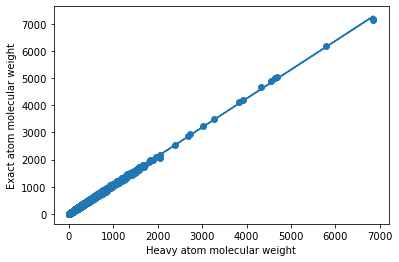

In [25]:
#hint("comm_1.3")

from scipy.stats import linregress

plt.scatter(drugs['heavyDesc'], drugs['exactDesc'])
plt.xlabel("Heavy atom molecular weight")
plt.ylabel("Exact atom molecular weight")

regression = linregress(drugs['heavyDesc'], drugs['exactDesc'])
plt.plot(drugs['heavyDesc'], regression.slope*drugs['heavyDesc'] + regression.intercept)
print("Parameters of regression:\n Slope =" + str(regression.slope) +"\n Intercept = " + str(regression.intercept))

3) Visualize the results

In [ ]:
# hint("comm_1.3")

#see above

# Exercise 2: Lipinski Rule of 5

- Determine the percentage of drugs which fulfill the Lipinski rule. (you may need to import another submodule named [`Lipinski`](https://www.rdkit.org/docs/source/rdkit.Chem.Lipinski.html).)

In [30]:
# hint("comm_2.1")
# hint("comm_2.2")
# hint("comm_2.3")
from rdkit.Chem import Lipinski


def firstRule(mol):
    return Lipinski.NumHDonors(mol) <= 5
def secondRule(mol):
    return Lipinski.NumHAcceptors(mol) <= 10
def fourthRule(mol):
    return Chem.Crippen.MolLogP(mol) <= 5

acceptable = []

for i in range (len(drugs)):
    if firstRule(drugs['images'][i]) + secondRule(drugs['images'][i]) + (drugs['exactDesc'][i] < 500) +  fourthRule(drugs['images'][i]) >= 3:
        acceptable.append(drugs['name'][i])
    else:
        None

#print(acceptable)
percentage = len(acceptable)/len(drugs)*100
print(percentage)


88.02863436123349


In [ ]:
assert percentage > 0 and percentage < 1, "The percentage should be inbetween 0 and 1."

# Exercise 3: Radius of Gyration

- Take 100 random molecules from the data base and continue with this selection
- Investigate the correlation between the molecular weight and the radius of gyration. 

To calculate the radius of gyration, you will need to generate 3D conformations, for example with `EmbedMolecule`. 

Q: This may error for some molecules, why and how can you resolve this issue?

YOUR ANSWER HERE

1) Take 100 random molecules from the data base and continue with this selection.

In [ ]:
# hint("comm_3.1")

# YOUR CODE HERE
raise NotImplementedError()

2) Calculate the Radius of Gyration and Molecular Weight for the selection.

In [ ]:
# hint("comm_3.2")
# hint("comm_3.3")

# YOUR CODE HERE
raise NotImplementedError()

3) Investigate and visualize the correlation between the two Descriptors.

In [ ]:
# hint("comm_3.3")

# YOUR CODE HERE
raise NotImplementedError()